<a href="https://colab.research.google.com/github/eduardocdv/Time-series-forecasting-Recife/blob/main/S%C3%A9rie_ISS_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rpy2==3.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 14.3 MB/s 
  Created wheel for rpy2: filename=rpy2-3.5.0-cp37-cp37m-linux_x86_64.whl size=310481 sha256=a2499939d67734a87432c85e31bc46ec62034d52f4e8eb8094be21cf8a623006
  Stored in directory: /root/.cache/pip/wheels/db/53/4c/eb880fb8f384fc56b8a6698f404694248f1e4fea06204b31e4
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R 
install.packages('forecast', repos='https://cloud.r-project.org/')

(as ‘lib’ is unspecified)





































































	‘/tmp/RtmpzydavP/downloaded_packages’



In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 7.1 MB/s 
     |████████████████████████████████| 9.9 MB 50.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


Grupo: Daniel Lins, Eduardo Vasconcelos, Maurício Sales e Sérgio Veloso

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn
import statsmodels.graphics.tsaplots as smt;
import statsmodels.api as sm
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf



In [ ]:
df = pd.read_excel('iss_06.2008_10.2022.formatado.xlsx')
df.tail()

,Grupo,Descricao,Total,JUN/2008,JUL/2008,AGO/2008,SET/2008,OUT/2008,NOV/2008,DEZ/2008,...,JAN/2022,FEV/2022,MAR/2022,ABR/2022,MAI/2022,JUN/2022,JUL/2022,AGO/2022,SET/2022,OUT/2022
25,17.0,BELEZA E HIGIENE PESSOAL,2.601507e+07,0.00,13678.01,22734.31,22513.54,25093.64,23305.14,16939.85,...,360195.65,379911.12,423643.11,356465.75,378562.93,365418.49,396199.09,434188.49,399046.45,407577.23
26,31.0,AUTONOMO NÍVEL MÉDIO,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
27,29.0,ATIVIDADES AGROPECUARIAS E EXTRATIVAS,8.664928e+05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,18.25,0.00,10.00,0.00,0.00,0.00,436.48
28,27.0,COMERCIO ATACADISTA,1.197540e+03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
29,NaN,TOTAL,5.850123e+09,427713.57,3173080.06,8836777.37,11454058.67,12376094.97,13019439.12,15431219.56,...,48000122.56,50015760.58,53583178.09,51460152.03,54183139.30,52416400.59,53929677.38,58452144.87,60814042.49,58284573.61


In [ ]:
total_iss = (df.iloc[29])

In [ ]:
iss = total_iss[3:176]


Criando um índice datetime, com valores mensais de Jun/2008 a Out/2022

In [ ]:
datetime_series = pd.Series(pd.date_range("2008-06", periods=173, freq="M"))

In [ ]:
iss = pd.Series(iss.values, index = datetime_series)

Plotando a série

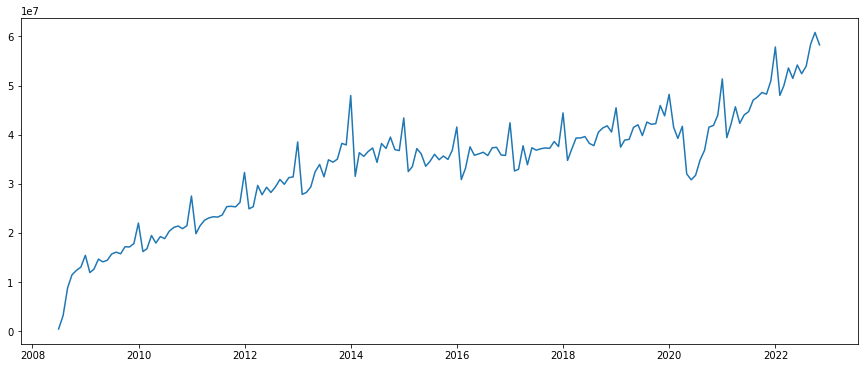

In [ ]:
plt.plot(iss)
plt.show()

Análise de distribuição do total de gastos mensais



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


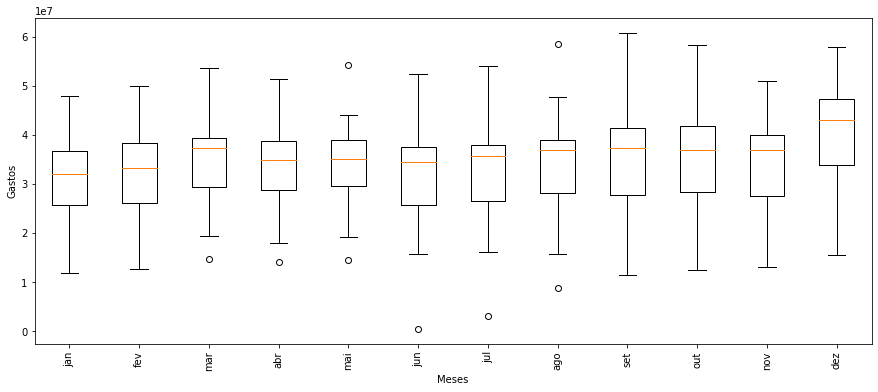

In [ ]:
gastos=[]

for i in range(1,13):
  gastos.append(iss[iss.index.month == i])

mes = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
my_dc = {}
for i in range(12):
  my_dc[mes[i]]=gastos[i]

fig, ax = plt.subplots()
ax.boxplot(my_dc.values())
ax.set_xticklabels(my_dc.keys(),rotation=90)
ax.set_xlabel('Meses')
ax.set_ylabel('Gastos')
plt.show()

Visualização de média e desvio padrão da série

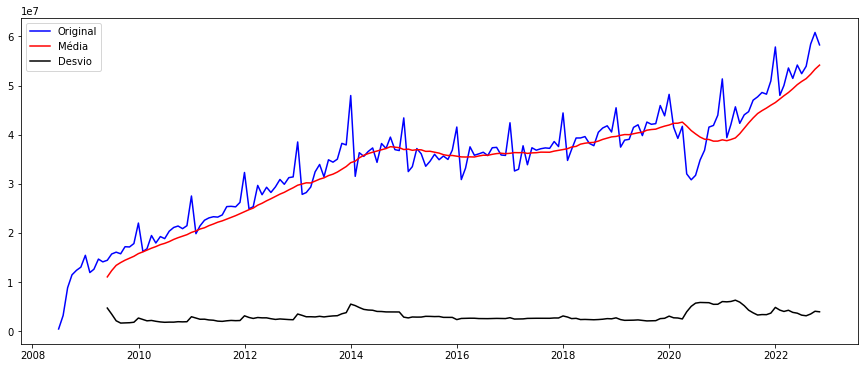

In [ ]:
m_m = iss.rolling(window=12).mean()
m_std = iss.rolling(window=12).std() 

orig = plt.plot(iss, color='blue',label='Original')
mean = plt.plot(m_m, color='red',label='Média')
std = plt.plot(m_std, color='black',label='Desvio')
plt.legend(loc='best')
plt.show()

Decomposição da série

<Figure size 1200x480 with 0 Axes>

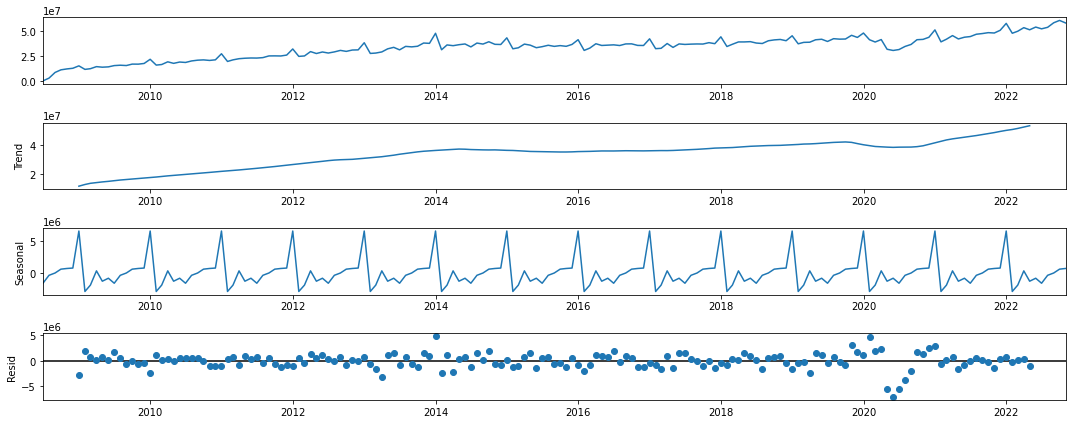

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(iss, model="additive",period=12)
plt.figure(figsize=(15, 6),dpi=80)
decompose_result.plot()
plt.show()

Outra forma de visualização da decomposição da série

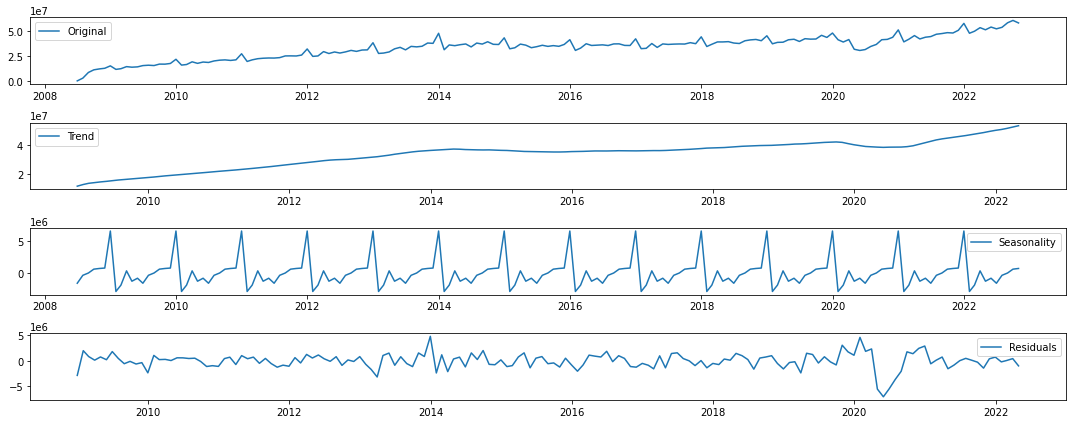

In [ ]:
decomp = seasonal_decompose(iss)
tendencia = decomp.trend
sazonalidade = decomp.seasonal
residuo = decomp.resid
plt.subplot(411)
plt.plot(iss, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(tendencia, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(sazonalidade,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residuo, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Estudo dos mapas de autocorrelação e autocorrelação parcial

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


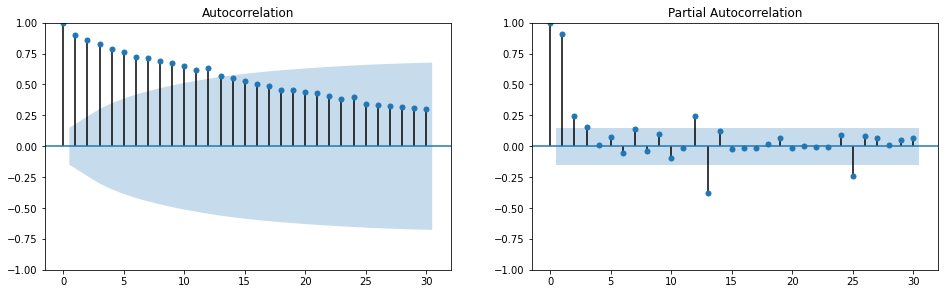

In [ ]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

acf_pacf(iss,30)

Teste de estacionariedade da série


In [ ]:
from statsmodels.tsa.stattools import adfuller
def teste_df(serie):
    #H0: série não estacionária 
    dftest = adfuller(serie, autolag='AIC')
    df_output = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags','Nº Observações'])
    for key,value in dftest[4].items():
        df_output['Valor Crítico (%s)'%key] = value
    print(df_output)
    if df_output[0] < df_output['Valor Crítico (10%)']: # descarta a H0 se o teste estatistico for menor que o valor crítico 
        
        print('--------estacionária')
    else:
        print(df_output[0])
        print('--------não estacionária')

In [ ]:
teste_df(iss)

Test Statistic           0.377303
p-value                  0.980626
#Lags                   13.000000
Nº Observações         159.000000
Valor Crítico (1%)      -3.472161
Valor Crítico (5%)      -2.879895
Valor Crítico (10%)     -2.576557
dtype: float64
0.3773034893736606
--------não estacionária


In [ ]:
res=adfuller(iss)
print('ADF Statistic: %f' % res[0])
print('p-value: %f' % res[1])
print('Critical Values:')
for key, value in res[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.377303
p-value: 0.980626
Critical Values:
	1%: -3.472
	5%: -2.880
	10%: -2.577


Como a série não é estacionária, é necessário fazer um estudo das diferenciações da série

Plot da primeira diferenciação

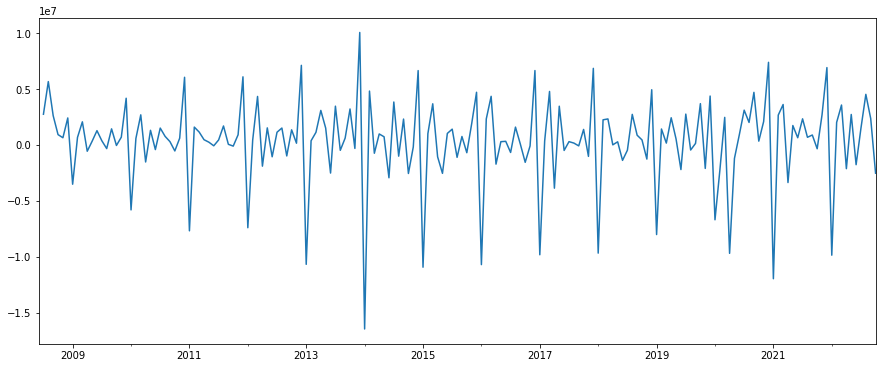

In [ ]:
serie_diff_pd = iss.diff()
serie_diff_pd.plot()

Segunda diferenciação

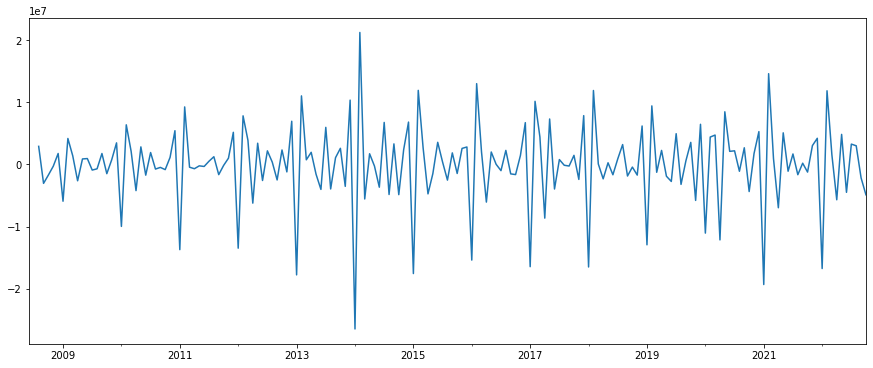

In [ ]:
serie_diff_pd.diff().plot()

Mapa de autocorrelação da primeira diferenciação

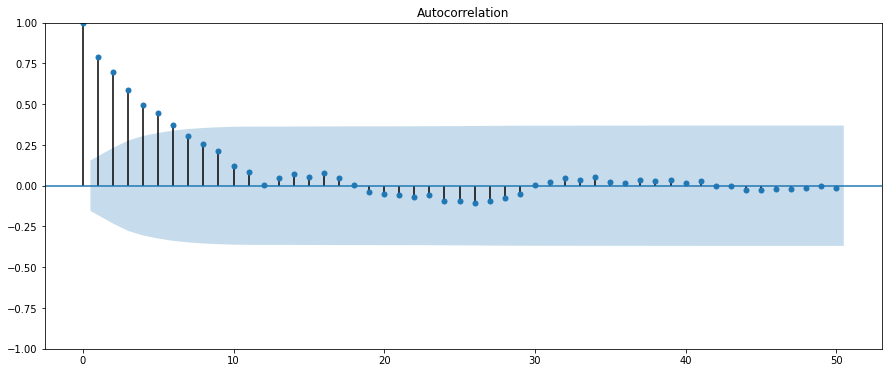

In [ ]:
smt.plot_acf(iss.diff(12).dropna(), lags=50, alpha=0.05);

Mapa de autocorrelação da segunda diferenciação

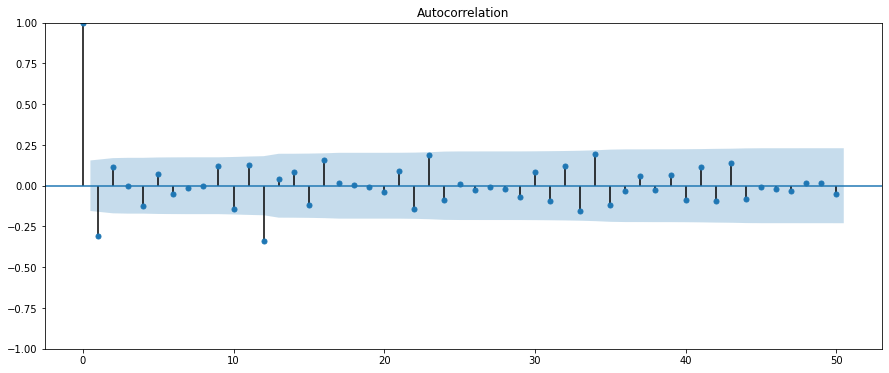

In [ ]:
smt.plot_acf(iss.diff(12).diff().dropna(), lags=50, alpha=0.05);

A partir da segunda diferenciação, observa-se que os lags praticamente não têm correlação temporal, estando a maioria no intervalo de confiança de 0,05. Então, a ordem D do modelo ARIMA será 2.

Dividindo em treino e teste e executando o arima com ordens p = 12, q = 2 e d = 2, valores obtidos através dos estudos de correlação da série.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sta

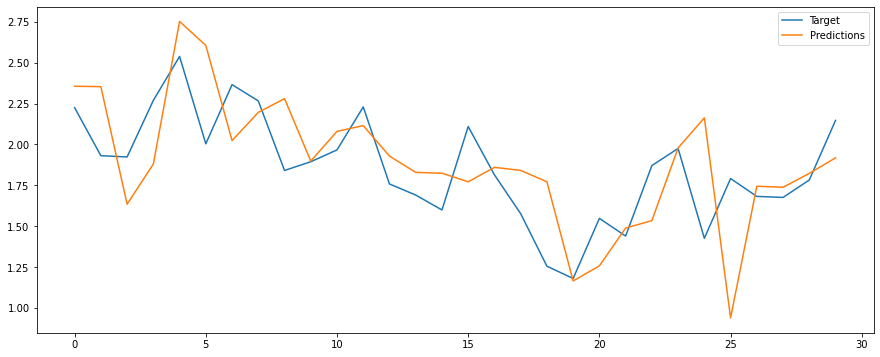

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
np.random.seed(35)
x=np.random.uniform(size =100)
w=np.random.uniform(size =100)
for i in range(2,100,1):
  x[i]=0.7*x[i-1]+w[i]
#plot_acf(x,lags=20)
#plot_pacf(x,lags=20)


predictions=[]
startpoint=70
modelo_arma = ARIMA(x[:70], order=(2, 2, 12)).fit()
predictions.append(modelo_arma.forecast())
startpoint=startpoint+1
for i in range(29):
  modelo_arma = ARIMA(x[:startpoint], order=(2, 2, 12)).fit()
  predictions.append(modelo_arma.forecast())
  startpoint=startpoint+1

plt.plot(range(30),x[70:],range(30),predictions)
plt.legend(['Target','Predictions'])
plt.show()

In [ ]:
def mape(a,b):
    return  100*sum(np.absolute((np.array(a)-np.array(b))/(np.array(a))))/len(a)

In [ ]:
from sklearn.metrics import mean_squared_error as mse 
erro = mse(x[70:],predictions)
print('Erro ARIMA(2,2,12) = %f'%erro)



Erro ARIMA(2,2,12) = 0.108904


In [ ]:
mape(x[70:],predictions).mean()

22.40130234934848

AUTO ARIMA

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -1961.409
Date:                Sat, 26 Nov 2022   AIC                           3932.817
Time:                        18:02:23   BIC                           3946.755
Sample:                             0   HQIC                          3938.478
                                - 121                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.556e+05   3.35e+05      1.957      0.050    -993.974    1.31e+06
ar.L1         -0.7194      0.057    -12.700      0.000      -0.830      -0.608
ar.L2         -0.4672      0.095     -4.907      0.0

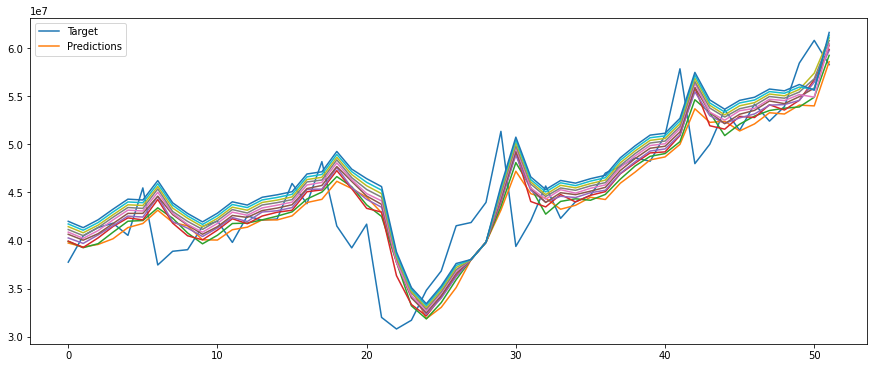

In [ ]:
import rpy2.robjects as r
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
from sklearn.metrics import mean_squared_error
from collections import OrderedDict
import statsmodels.graphics.tsaplots as acf
import pmdarima as pm
# VERSÃO COMLETA COM EXCEL ARIMA,ARIMAX,SARIMA,SARIMAX
trainset=0.60
valset = 0.20
testNO=0.20
dimension=12

def mape(a,b):
    return  100*sum(np.absolute((np.array(a)-np.array(b))/(np.array(a))))/len(a)

data_v = iss.values
trainSize = np.int32(np.floor(0.7*len(data_v)))
testSize = len(data_v)-trainSize
x_treino = data_v[:trainSize]
x_test = data_v[trainSize:]
xl = x_treino.tolist()
model = pm.auto_arima(x_treino)
predictions1=[]
print(model.summary())
predictions1.append(model.predict())
for i in range(len(x_test)-1):
  xl.append(x_test[i])
  model = pm.auto_arima(xl)
  predictions1.append(model.predict())
print(model.summary())

plt.plot(range(len(x_test)),x_test,range(len(x_test)),predictions1)
plt.legend(['Target','Predictions'])

SRV

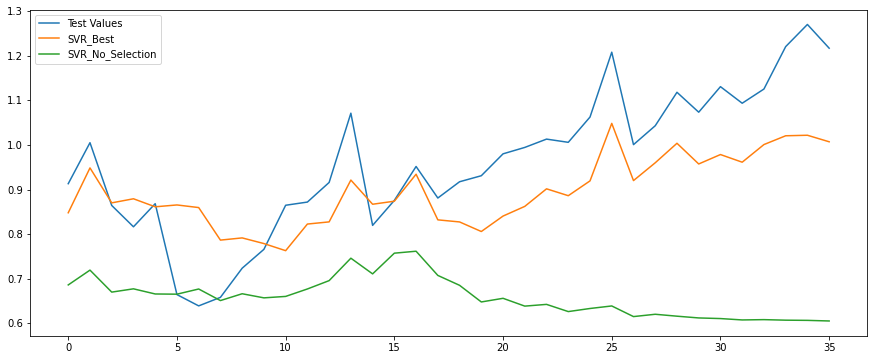

In [ ]:
from sklearn.svm import SVR # support vector regression 
from sklearn.metrics import mean_squared_error as mse
trainSplit = 0.6
validSplit= 0.2


dataset = iss
trainSize = int(np.floor(trainSplit*len(dataset)))
validSize = int(np.floor(validSplit*len(dataset)))

maxData = np.max(dataset[0:trainSize])
minData = np.min(dataset[0:trainSize])

ndataset  = (dataset  - minData)/(maxData-minData)


datasetSeries = pd.Series(ndataset)
dimension = 12
stepahead = 1
datasetShifted = pd.concat([datasetSeries.shift(i) for i in range(dimension+stepahead) ],axis=1)

train = (datasetShifted.iloc[dimension:trainSize,1:])
trainTarget = (datasetShifted.iloc[dimension:trainSize,0])

valid = datasetShifted.iloc[trainSize:(validSize+trainSize),1:]
validTarget = datasetShifted.iloc[trainSize:(validSize+trainSize),0]

test = datasetShifted.iloc[(validSize+trainSize):,1:]
testTarget = datasetShifted.iloc[(validSize+trainSize):,0]



g=(10.0)**np.arange(-5,3,1) #10
e = (10.0)**np.arange(-4,-1,1) # 10
c=(10.0)**np.arange(-2,3,1)#10
bestValue = 10**100000
erroval = []
param=[]
bestSVR=0
for i in g:
    for j in e:
        for k in c:

            mySVR = SVR(C=k,gamma=i,epsilon=j)
            mySVR.fit(train,trainTarget)
            
            predVals = mySVR.predict(valid)
            erro = mse(predVals,validTarget)
            erroval.append(erro)
            param.append((i,j,k))
            if erro<bestValue:
                bestValue=erro
                bestSVR = mySVR


predTest = bestSVR.predict(test)
mseTest = mse(predTest,testTarget)

SVR_no_Selection = SVR()
SVR_no_Selection.fit(train,trainTarget)
predTestNoSelection = SVR_no_Selection.predict(test)

mseTest_noSelection = mse(predTestNoSelection,testTarget)







plt.plot(testTarget.values)
plt.plot(predTest)
plt.plot(predTestNoSelection)
#plt.plot(predSVRGridCV)
plt.legend(['Test Values','SVR_Best','SVR_No_Selection'])

In [ ]:
mse(predTestNoSelection,testTarget)

0.12465417388603048

In [ ]:
mape(predTestNoSelection,testTarget)

47.43591633989369